## k-NN Classifier

### Importing Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt

### Custom kNN

In [14]:
def my_knn_classifier(train_data , train_labels , test_data , k):
    """
    Custom k-Nearest Neighbors classifier.

    Parameters:
        train_data (ndarray): Feature matrix for training data.
        train_labels (ndarray): Labels corresponding to training data.
        test_data (ndarray): Feature matrix for test points.
        k (int): Number of neighbors to consider.

    Returns:
        ndarray: Predicted labels for each test point.
    """
    predictions = []

    for test_point in test_data:
        # Step 1: Compute distances from test_point to all training points
        distances = np.linalg.norm(train_data - test_point , axis = 1)

        # Step 2: Find the indices of the k smallest distances
        k_nearest_indices = np.argsort(distances)[:k]

        # Step 3: Get the labels of the k nearest neighbors
        k_nearest_labels = train_labels[k_nearest_indices]

        # Step 4: Count the frequency of each label
        labels, counts = np.unique(k_nearest_labels, return_counts=True)

        # Step 5: Pick the label with the highest count (majority vote)
        most_common_label = labels[np.argmax(counts)]

        # Step 6: Save the predicted label
        predictions.append(most_common_label)

    return np.array(predictions)

### Gaussian Parameters for Both Classes

In [15]:
np.random.seed(42)

num_points = 100

# Mean of each class
mean_class_a = [1.5 , 1.5]
mean_class_b = [-2.0 , -2.0]

# Covariance matrices (shape & spread of clusters)
cov_class_a = [[0.9 , 0.3] , [0.3, 0.9]]
cov_class_b = [[1.0 , -0.5] , [-0.5 , 1.0]]

### Generating Synthetic Data

In [16]:
# Sample 2D points for each class using multivariate normal distribution
points_class_a = np.random.multivariate_normal(mean_class_a , cov_class_a , num_points)
points_class_b = np.random.multivariate_normal(mean_class_b , cov_class_b , num_points)

# Combine the points into one dataset
features = np.vstack((points_class_a , points_class_b))

# Create class labels: 0 for class A, 1 for class B
labels = np.hstack((np.zeros(num_points) , np.ones(num_points)))

### Plotting the Training Data points

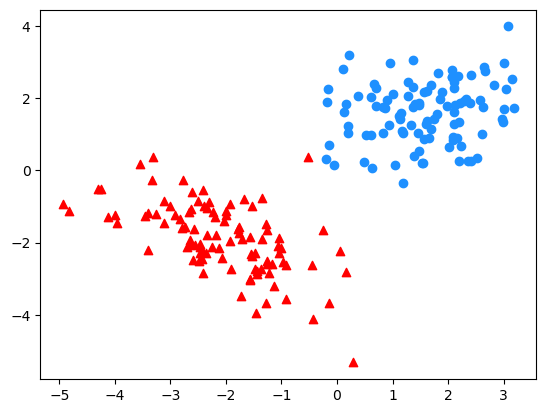

In [17]:
plt.scatter(points_class_a[: , 0] , points_class_a[: , 1] , color = 'dodgerblue' , marker = 'o' , label = 'Class A')
plt.scatter(points_class_b[: , 0] , points_class_b[: , 1] , color = 'red' , marker = '^' , label = 'Class B')

### Defining Grid

In [18]:
# Compute the plotting range for feature x1 and x2
x1_min , x1_max = features[: , 0].min() - 1 , features[: , 0].max() + 1
x2_min , x2_max = features[: , 1].min() - 1 , features[: , 1].max() + 1

# Create a mesh grid of (x1, x2) coordinates
grid_x1 , grid_x2 = np.meshgrid (
    np.arange(x1_min , x1_max , 0.02) ,
    np.arange(x2_min , x2_max , 0.02)
)

# Flatten the grid and prepare test points for prediction
grid_points = np.c_[grid_x1.ravel() , grid_x2.ravel()]

### Classifying Data

In [19]:
k_value = 3

# Predict class labels for all points on the grid
grid_predictions = my_knn_classifier(features , labels , grid_points , k_value)

# Reshape the predictions back to grid shape for contour plotting
grid_predictions = grid_predictions.reshape(grid_x1.shape)

### Plotting

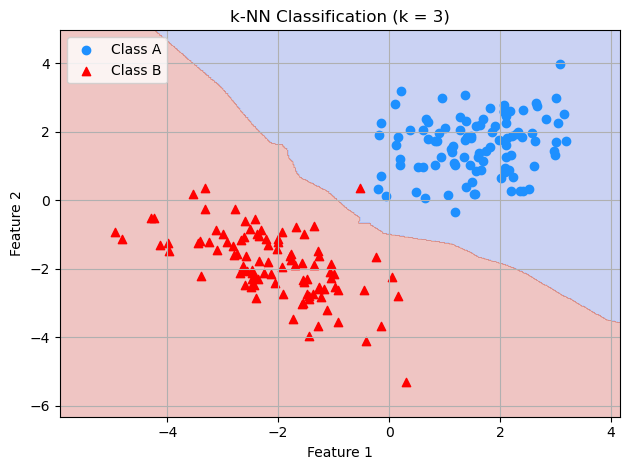

In [20]:
# Draw decision regions (background colors)
plt.contourf(grid_x1 , grid_x2 , grid_predictions , alpha = 0.3 , cmap = 'coolwarm')

# Plot original data points with labels for legend
plt.scatter(points_class_a[: , 0] , points_class_a[: , 1], color = 'dodgerblue' , marker = 'o', label = 'Class A')
plt.scatter(points_class_b[: , 0] , points_class_b[: , 1], color = 'red' , marker = '^', label = 'Class B')

# Add titles, axis labels, legend, grid
plt.title(f'k-NN Classification (k = {k_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()